In [1]:
from machinelearning.mlpipeline import MLPipelines

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import optuna
import pandas as pd
# from sklearn.preprocessing import LabelEncoder ###
# from sklearn.cross_decomposition import PLSRegression

# model = LogisticRegression()
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1],
#     'penalty': ['l1', 'l2']
# }
csv_dir = 'data/composite_dataset.csv'
label = 'group'

model = LogisticRegression()
param_grid = {
    'n_estimators': [10, 20, 50],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# mlpipe = MLPipelines(estimator=model, param_grid=param_grid, label=label, csv_dir=csv_dir)
# mlpipe.normalize()

/home/spyros/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# dataloader
mlpipe = MLPipelines(estimator=model, param_grid={}, label=label, csv_dir=csv_dir)
# mlpipe._encode_labels()
mlpipe.normalize()

Label mapping: {'Factor1:CASE': 0, 'Factor1:CONTROL': 1}


In [3]:
# mlpipe.bayesian_search()
# xg = [RandomForestClassifier(), GradientBoostingClassifier(), LinearDiscriminantAnalysis(), LogisticRegression(), GaussianNB(), KNeighborsClassifier(), DecisionTreeClassifier(), SVC()]
xg = [LinearDiscriminantAnalysis(), XGBClassifier(), GradientBoostingClassifier(), GaussianNB(), KNeighborsClassifier(), DecisionTreeClassifier(), SVC()]

In [4]:
# fitted_mod = mlpipe.model_selection(optimizer='bayesian_search',n_trials=2,num_trials=2,score='accuracy',exclude=xg, n_iter=2, train_best='bayesian_search',return_model=True)#, exclude=[XGBClassifier()],result=True)

In [5]:
# fitted_mod

In [6]:
import pickle
filename = 'fitted.sav'
# # pickle.dump(fitted_mod, open(filename, 'wb'))

In [7]:
fitted_mod = pickle.load(open(filename, 'rb'))
mlpipe.best_estimator = fitted_mod

mlpipe.name = fitted_mod.__class__.__name__

PermutationExplainer explainer: 72it [03:25,  3.02s/it]                        


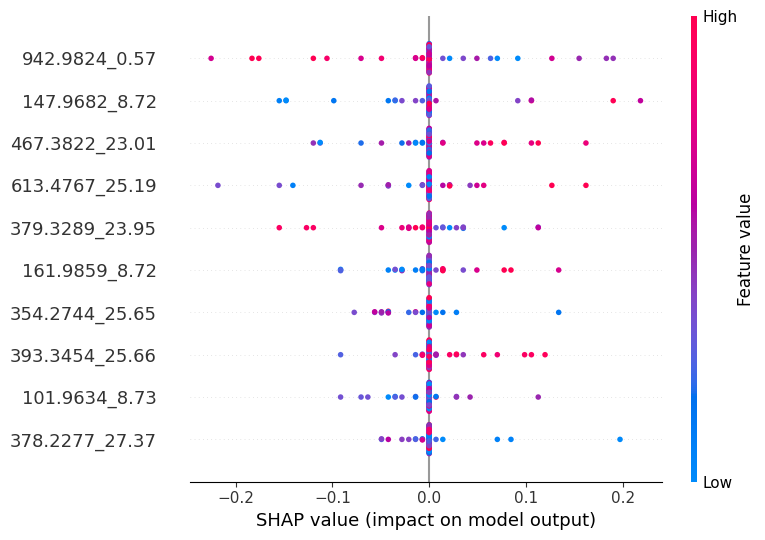

In [8]:
mlpipe.plot_shap_values(explainer_type='general',max_display=10)

**χερατα**

In [9]:
import shap
import numpy as np
shap.initjs()

In [11]:
explainer = shap.Explainer(fitted_mod.predict, mlpipe.X)

shap_values = explainer(mlpipe.X,max_evals=2861)


PermutationExplainer explainer: 72it [03:23,  3.00s/it]                        


In [12]:
np.shape(shap_values.values)

(71, 1430)

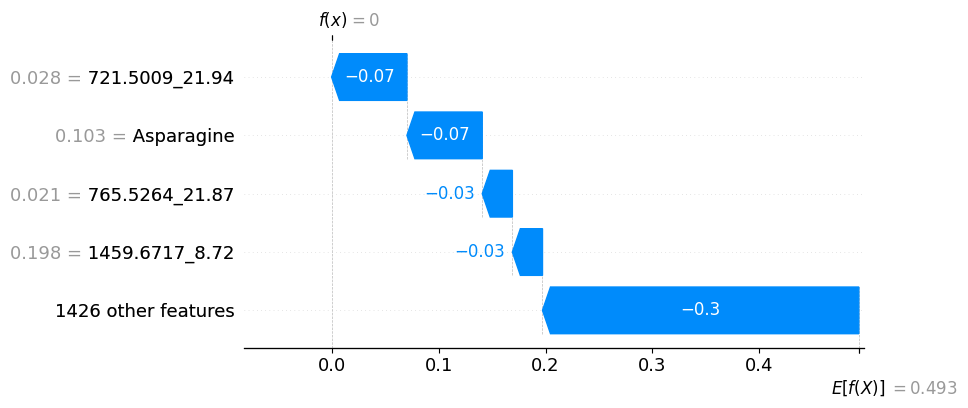

In [13]:
shap_values_for_class = shap_values[5, :]

shap.plots.waterfall(shap_values_for_class, max_display=5, show=True)

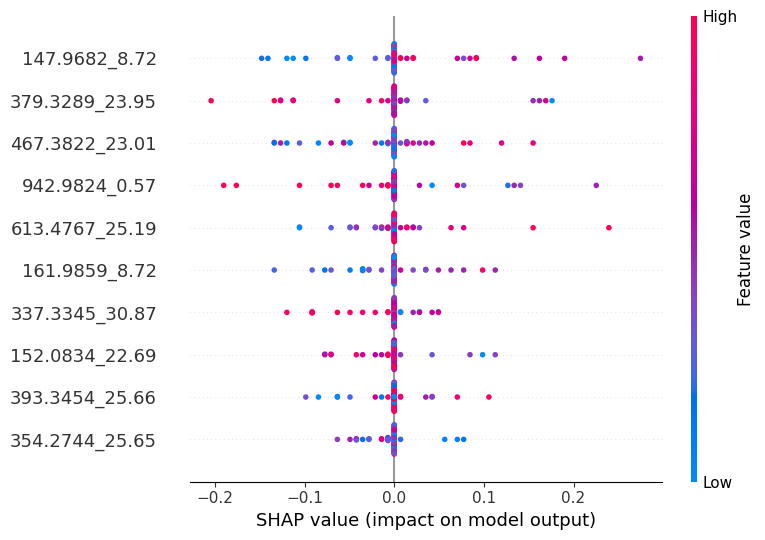

In [14]:
shap_values_for_class = shap_values[:, :]
shap.summary_plot(shap_values_for_class, max_display=10)

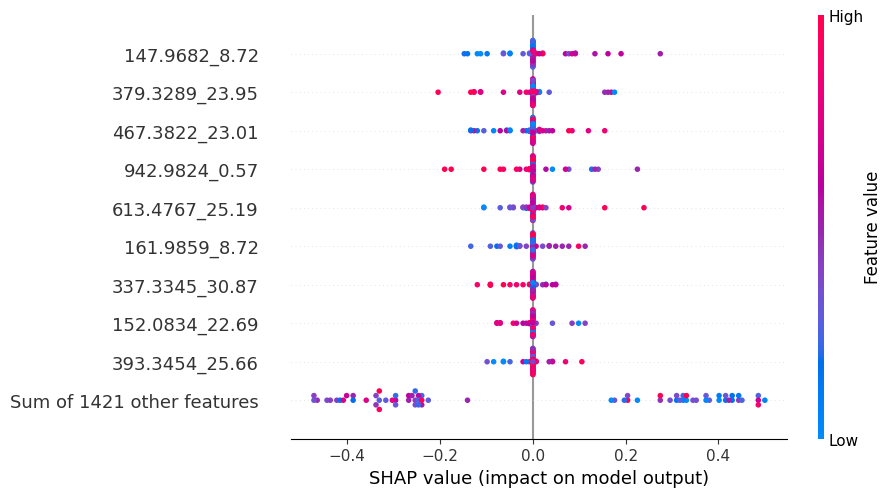

In [15]:
shap.plots.beeswarm(shap_values_for_class, max_display=10, order=shap.Explanation.abs.mean(0), clustering=None, cluster_threshold=0.5, color=None, axis_color='#333333', alpha=1, show=True, log_scale=False, color_bar=True, plot_size='auto', color_bar_label='Feature value')